In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the Iris data set 
from sklearn import datasets
iris = datasets.load_iris()

# divide this data into features and labels
X = iris.data
y = iris.target

print ("X is of type: {}".format(type(X)))
print ("y is of type: {}".format(type(y)))

# How does our data look
#print first 5 rows of X
print ("First 5 rows of our data: {}".format(X[:5,:]))

#print the unique labels in y
print ("unique labels: {}".format(np.unique(y)))

X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
First 5 rows of our data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
unique labels: [0 1 2]


In [3]:
X = X[:,:2] # Use only the first 2 columns. This is for easy plotting/visualisation
#print first 5 rows of X
print ("First 5 rows of our data: {}".format(X[:5,:]))

First 5 rows of our data: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [4]:
from sklearn.model_selection import train_test_split

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

print (Xtrain.shape)
print (ytrain.shape)
print (Xtest.shape)
print (ytest.shape)

Xtrain[:5,:] # first 5 rows of training data

(120, 2)
(120,)
(30, 2)
(30,)


array([[4.6, 3.6],
       [5.7, 4.4],
       [6.7, 3.1],
       [4.8, 3.4],
       [4.4, 3.2]])

In [5]:
from matplotlib.colors import ListedColormap

# We define a colormap with three colors, for three labels our data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator), 
    '''
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

KNN Training Accuracy: 0.825


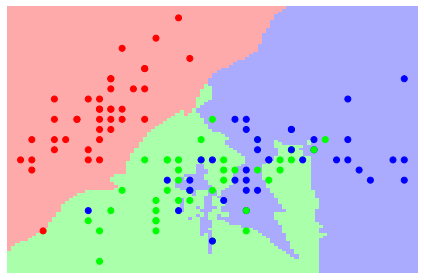

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Build a kNN using 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using our training data
knn_model.fit(Xtrain, ytrain)

# Training Accuracy:
knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
print ("KNN Training Accuracy: {}".format(knn_acc))

# Visualize the decision bounday. The points represent the true data. 
plot_estimator(knn_model, Xtrain, ytrain)

In [7]:
#Testing Accuracy:
knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Testing Accuracy: 0.8


In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
titanic_df = pd.read_csv("Titanic_cleaned_data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,0,1
1,2,1,1,0,38.0,0,0
2,3,1,3,0,26.0,0,1
3,4,1,1,0,35.0,0,1
4,5,0,3,1,35.0,0,1


In [12]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic_df[feature_cols]
y = titanic_df.Survived

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# fit a classification tree with max_depth=5
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [15]:
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8523274478330658
Testing accuracy : 0.7723880597014925


In [16]:
# use crossvalidation to get avg accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.74603175 0.79365079 0.85714286 0.87096774 0.79032258 0.75806452
 0.79032258 0.72580645 0.79032258 0.88709677]
Mean Accuracy: 0.8009728622631848


In [17]:
from sklearn.model_selection import validation_curve

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

#Size of train_scores will be: length of parameter (max_depth_range) X number of folds
print(train_scores.shape)

(10, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

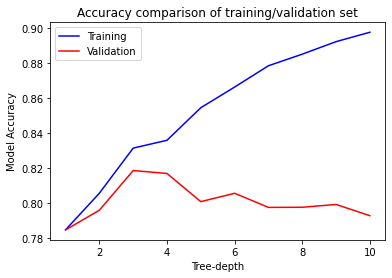

In [18]:
# Mean accuracy score for each value of max-depth
mean_train_score = np.mean(train_scores, axis=1)
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")

In [19]:
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(Xtrain,ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8298555377207063
Testing accuracy : 0.8059701492537313
